# PCA

# Task 1: Exploratory Data Analysis (EDA)

# 1. Load the dataset and perform basic data exploration.

In [67]:
import pandas as pd
# Load the dataset
df = pd.read_csv(r"C:\Users\sai\OneDrive\Desktop\wine.csv")
# Basic data exploration
print(df.head())
print(df.info())
print(df.describe())

   Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0     1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1     1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2     1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3     1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4     1    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0           0.28             2.29   5.64  1.04      3.92     1065  
1           0.26             1.28   4.38  1.05      3.40     1050  
2           0.30             2.81   5.68  1.03      3.17     1185  
3           0.24             2.18   7.80  0.86      3.45     1480  
4           0.39             1.82   4.32  1.04      2.93      735  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           No

# 2. Examine the distribution of features using histograms, box plots, or density plots.

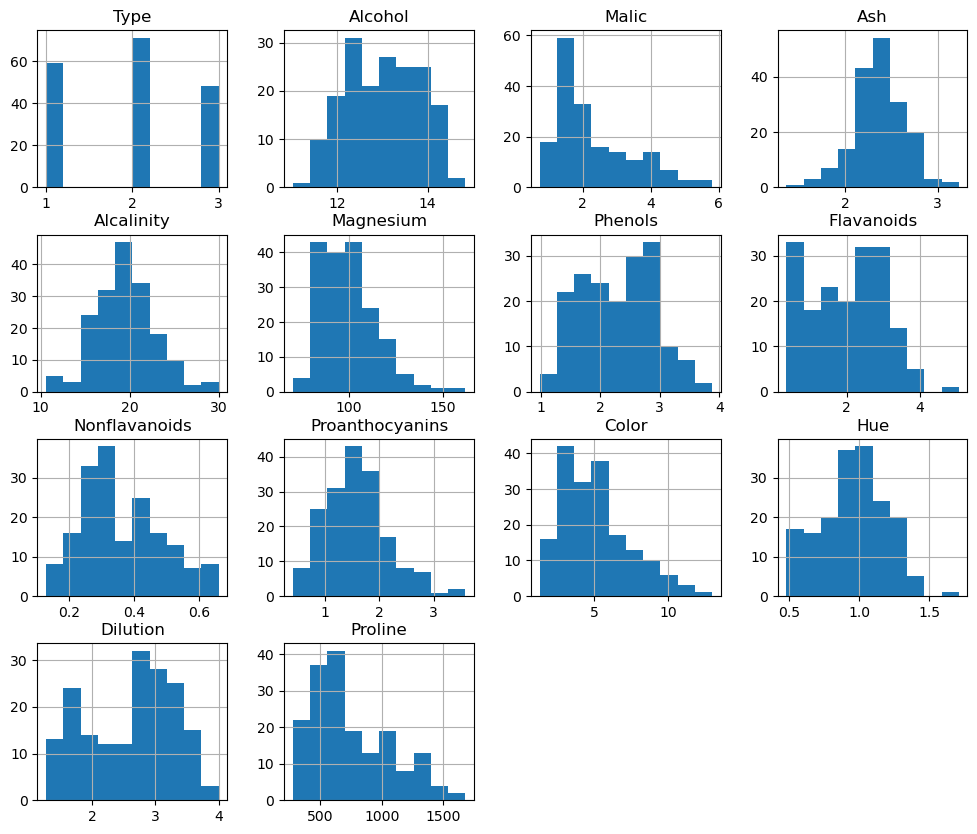

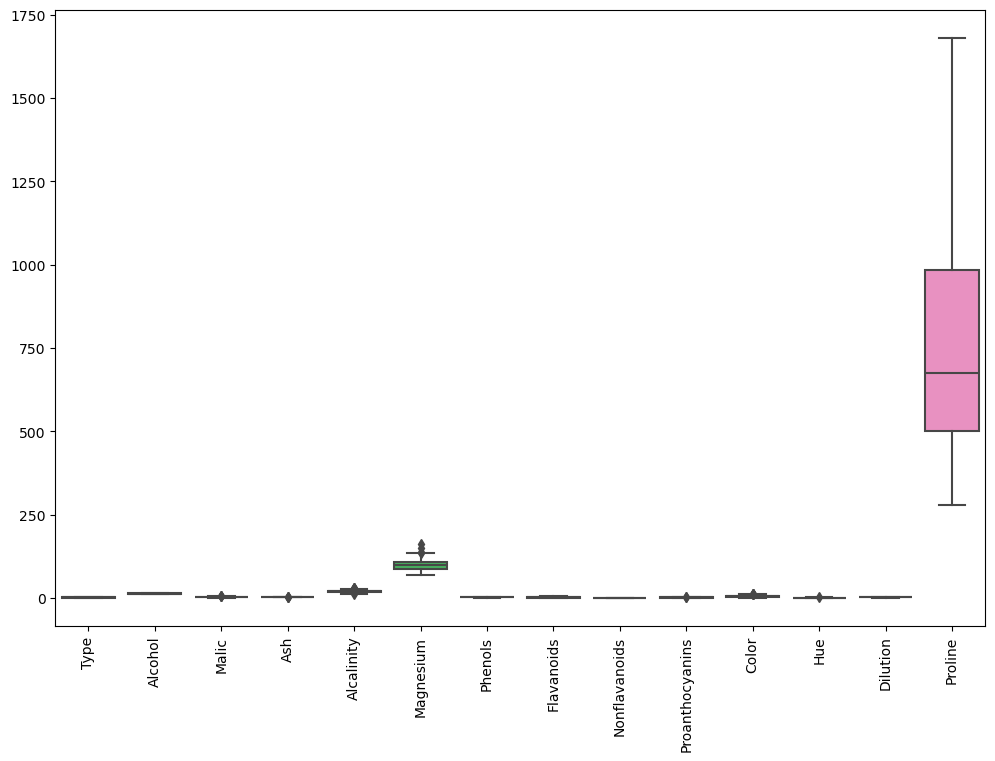

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

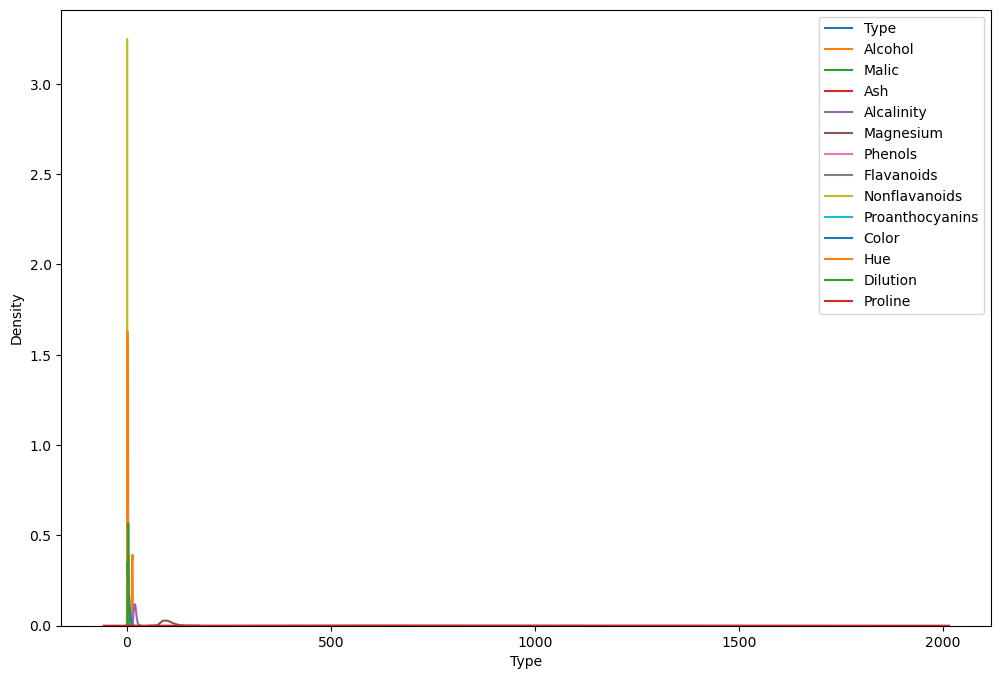

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
# Histograms
df.hist(figsize=(12, 10))
plt.show()
# Box plots
plt.figure(figsize=(12, 8))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()
# Density plots
plt.figure(figsize=(12, 8))
for column in df.columns:
    sns.kdeplot(df[column], label=column)
plt.legend()
plt.show()

# 3. Investigate correlations between features to understand relationships within the data.

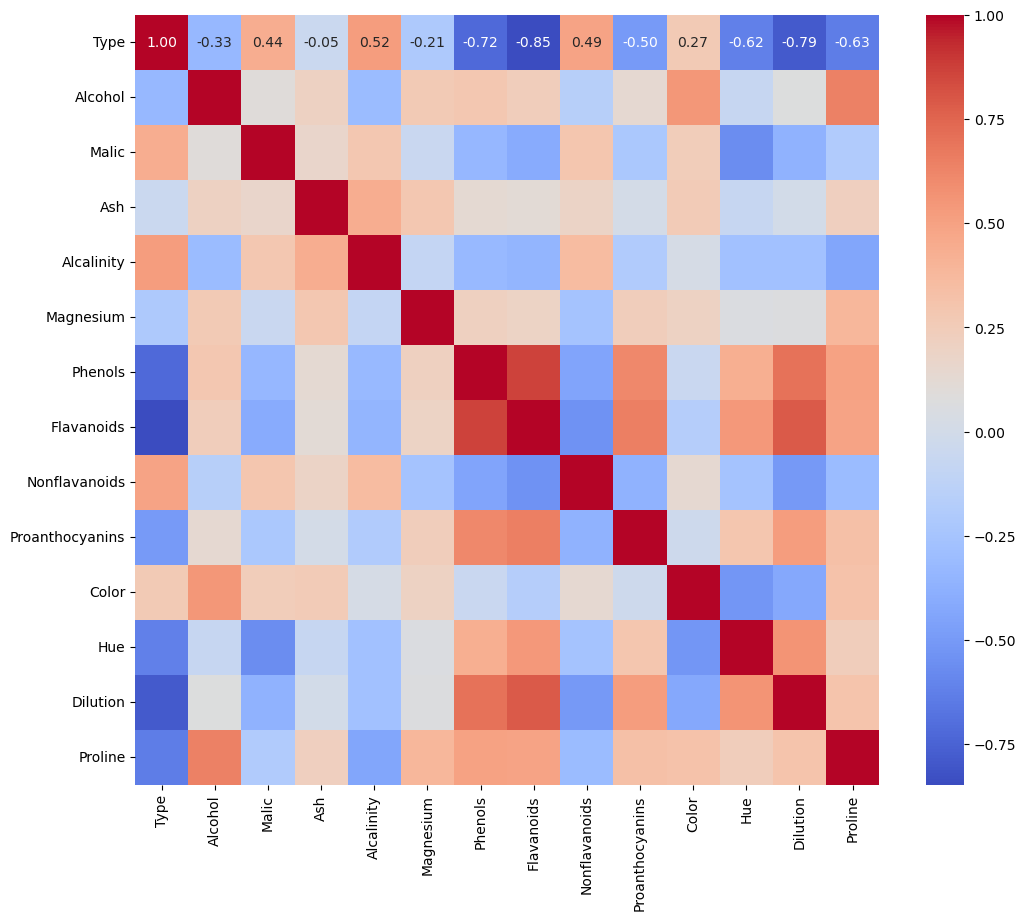

In [69]:
# Correlation matrix
corr = df.corr()
# Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

# Task 2: Dimensionality Reduction with PCA

# 1. Standardize the features to ensure they have a mean of 0 and a standard deviation of 1.

In [71]:
from sklearn.preprocessing import StandardScaler
# Standardize the features
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

# 2. Implement PCA to reduce the dimensionality of the dataset.

In [72]:
from sklearn.decomposition import PCA
# PCA
pca = PCA()
pca_result = pca.fit_transform(scaled_df)

# 3. Determine the optimal number of principal components using a scree plot or cumulative explained variance.

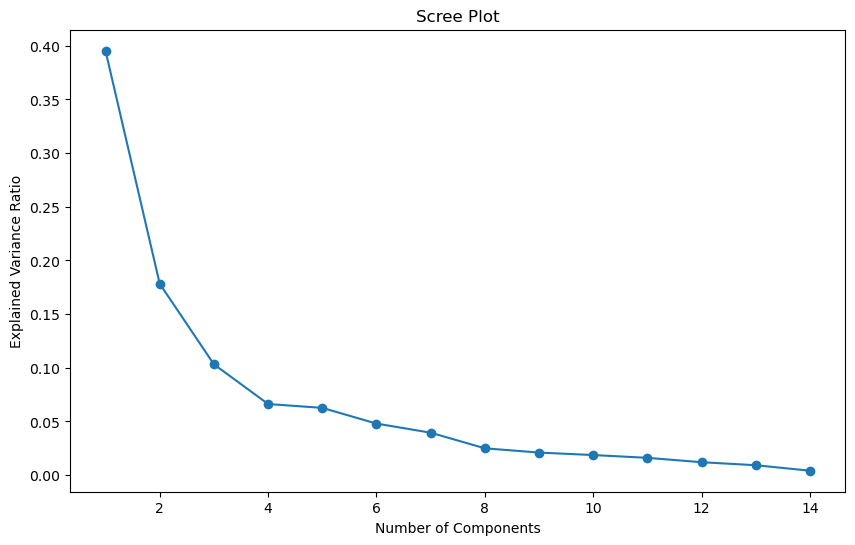

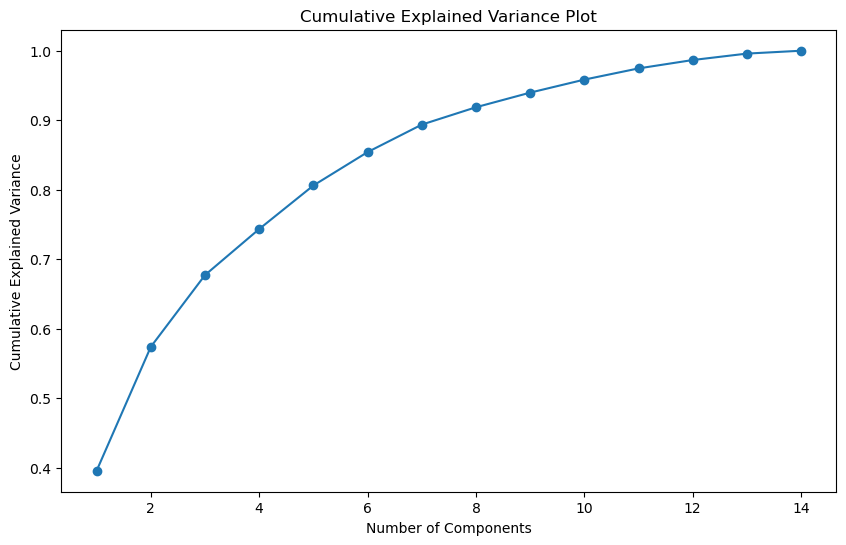

In [73]:
# Scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.show()
# Cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance Plot')
plt.show()

# 4. Transform the original dataset into the principal components.

In [74]:
# Number of components to keep, for example 2
pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(scaled_df)

# Task 3: Clustering with Original Data

# 1. Apply a clustering algorithm (e.g., K-means) to the original dataset.

In [76]:
from sklearn.cluster import KMeans
# K-means clustering
kmeans = KMeans(n_clusters=3)  # Number of clusters can be adjusted
kmeans.fit(df)
clusters_original = kmeans.predict(df)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


# 2. Visualize the clustering results using appropriate plots.

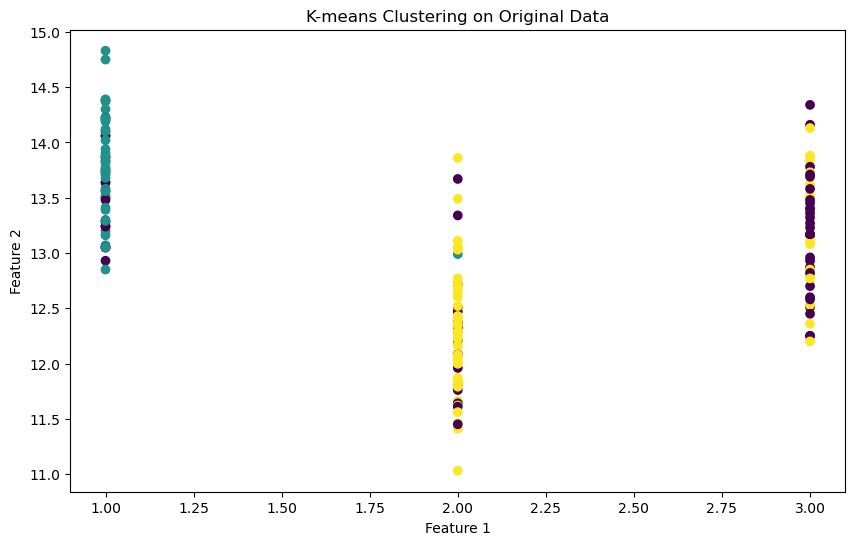

In [77]:
# Scatter plot of clusters
plt.figure(figsize=(10, 6))
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=clusters_original, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-means Clustering on Original Data')
plt.show()

# 3. Evaluate the clustering performance using metrics such as silhouette score or Davies–Bouldin index.

In [78]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
# Evaluate clustering performance
silhouette_avg = silhouette_score(df, clusters_original)
davies_bouldin_avg = davies_bouldin_score(df, clusters_original)
print(f'Silhouette Score: {silhouette_avg}')
print(f'Davies-Bouldin Index: {davies_bouldin_avg}')

Silhouette Score: 0.5711220218931753
Davies-Bouldin Index: 0.5342660703679679


# Task 4: Clustering with PCA Data

# 1. Apply the same clustering algorithm to the PCA-transformed dataset.

In [79]:
# K-means clustering on PCA-transformed data
kmeans_pca = KMeans(n_clusters=3)  # Number of clusters can be adjusted
kmeans_pca.fit(pca_transformed)
clusters_pca = kmeans_pca.predict(pca_transformed)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


# 2. Visualize the clustering results obtained from PCA-transformed data.

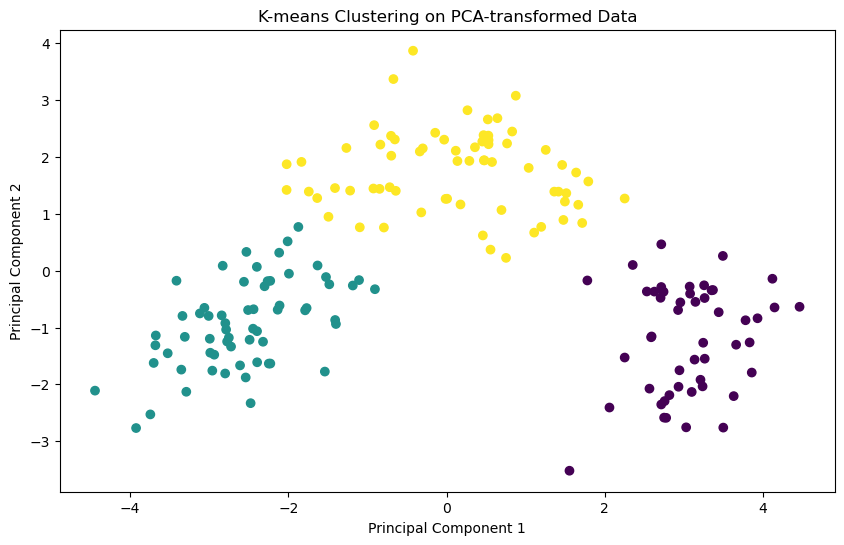

In [80]:
# Scatter plot of clusters in PCA space
plt.figure(figsize=(10, 6))
plt.scatter(pca_transformed[:, 0], pca_transformed[:, 1], c=clusters_pca, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering on PCA-transformed Data')
plt.show()

# 3. Compare the clustering results from PCA-transformed data with those from the original dataset.

In [81]:
# You can use the same evaluation metrics
silhouette_avg_pca = silhouette_score(pca_transformed, clusters_pca)
davies_bouldin_avg_pca = davies_bouldin_score(pca_transformed, clusters_pca)
print(f'Silhouette Score (PCA): {silhouette_avg_pca}')
print(f'Davies-Bouldin Index (PCA): {davies_bouldin_avg_pca}')

Silhouette Score (PCA): 0.6024415520362842
Davies-Bouldin Index (PCA): 0.5397078562575716


# Task 5: Comparison and Analysis

In [ ]:
1. Compare the clustering results obtained from the original dataset and PCA-transformed data.
Compare silhouette scores and Davies-Bouldin indices for both original and PCA-transformed data.
Examine the visual plots to observe clustering patterns.
2. Discuss any similarities or differences observed in the clustering results.
Differences in clustering results might be due to the reduced dimensionality which can affect the clustering structure.
Similarities might indicate that the reduced dimensions still capture the essence of the data.
3. Reflect on the impact of dimensionality reduction on clustering performance.
Dimensionality reduction can simplify the dataset and potentially improve clustering performance if irrelevant dimensions are removed.
It can also lead to loss of information which might negatively affect clustering.
4. Analyze the trade-offs between using PCA and clustering directly on the original dataset.
PCA can reduce computation time and noise but might lose some detail.
Clustering on original data preserves all features but might suffer from the "curse of dimensionality."

# Task 6: Conclusion and Insights

In [ ]:
1. Summarize the key findings and insights from the assignment.
Summarize the results of clustering on both original and PCA-transformed datasets.
Discuss the effectiveness of PCA in improving clustering performance or simplifying the data.
2. Discuss the practical implications of using PCA and clustering in data analysis.
PCA helps in reducing dimensionality, which can improve computational efficiency and visualization.
Clustering can be affected by the dimensionality of the data, making PCA a useful preprocessing step.
3. Provide recommendations for when to use each technique based on the analysis conducted.
Use PCA when dealing with high-dimensional data to simplify it and make clustering more effective.
Use clustering directly on the original data when preserving all features is crucial or when dimensionality is not excessively high.